In [1]:
#Pizza sales data--https://www.mavenanalytics.io/data-playground
# 1. total sales
# 2. identify which pizza is ordered the most
# 3. Identify which pizza category is hotselling.
# 4. Identify which pizza is generating more sales
# 5. identify which day of the week we are getting the hight orderes
# 6. identify the time at which we are getting high orders and the time at which we are getting the lowest orders
# 7. Identify at which time of the day, people are ordering more pizzas.  (morning/evening/afternoon/night)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns


In [3]:
orders = pd.read_csv("orders.csv")
orders.head()

order_details = pd.read_csv("order_details.csv")
order_details.head()

pizza_types = pd.read_csv("pizza_types.csv",encoding_errors= 'replace')
pizza_types.head()

pizzas = pd.read_csv("pizzas.csv")
pizzas.head()


,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [4]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [5]:
orders["date"] = orders["date"].astype("datetime64[ns]")
orders["time"] = orders["time"].astype("datetime64[ns]")

C:\Users\HP\AppData\Local\Temp\ipykernel_15652\852181070.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders["time"] = orders["time"].astype("datetime64[ns]")


In [6]:
order_details.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

# Q1. Total sales #

In [7]:
total_df = pd.merge(left = order_details, right = pizzas, on = "pizza_id", how = "inner")
total_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,179,77,hawaiian_m,1,hawaiian,M,13.25
2,357,146,hawaiian_m,1,hawaiian,M,13.25
3,389,163,hawaiian_m,1,hawaiian,M,13.25
4,568,247,hawaiian_m,1,hawaiian,M,13.25


In [8]:
total_df["total_price"] = total_df["quantity"] * total_df["price"]
total_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,total_price
0,1,1,hawaiian_m,1,hawaiian,M,13.25,13.25
1,179,77,hawaiian_m,1,hawaiian,M,13.25,13.25
2,357,146,hawaiian_m,1,hawaiian,M,13.25,13.25
3,389,163,hawaiian_m,1,hawaiian,M,13.25,13.25
4,568,247,hawaiian_m,1,hawaiian,M,13.25,13.25


In [9]:
#total sales :
print("Total pizza sales:",total_df["total_price"].sum())

Total pizza sales: 817860.0499999999


 # Q2. Identify which pizza is ordered the most #

In [10]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [11]:
pizza_orders = pd.merge(left = total_df, right = pizza_types, on = "pizza_type_id", how = "inner")
pizza_orders.head()


,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,total_price,name,category,ingredients
0,1,1,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [12]:
#type --1
gb = pizza_orders.groupby("name").agg({"order_details_id":"count"})
gb

,order_details_id
name,
The Barbecue Chicken Pizza,2372
The Big Meat Pizza,1811
The Brie Carre Pizza,480
The Calabrese Pizza,927
The California Chicken Pizza,2302
The Chicken Alfredo Pizza,980
The Chicken Pesto Pizza,961
The Classic Deluxe Pizza,2416
The Five Cheese Pizza,1359


In [13]:
#type - 2
pizza_orders["name"].value_counts()

name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza           

In [14]:
#The most ordered pizza :
print("The most ordered pizza is:",gb["order_details_id"].idxmax())

The most ordered pizza is: The Classic Deluxe Pizza


# Q3. Identify which pizza category is hotselling #

In [15]:
#type--1
gb = pizza_orders.groupby("category").agg({"order_id":'count'})
gb

,order_id
category,
Chicken,10815
Classic,14579
Supreme,11777
Veggie,11449


In [16]:
#type--2
pizza_orders["category"].value_counts()

category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

In [17]:
# Hotselling pizza category :
print("The hotselling pizza category is: ",gb["order_id"].idxmax())

The hotselling pizza category is:  Classic


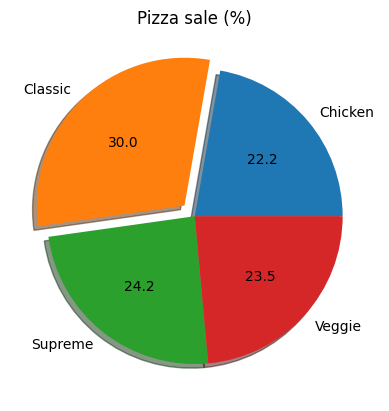

In [18]:
# Graphical representation of sale based on pizz category on Matplotlib
ex = [0,0.1,0,0]
mp.pie(gb.order_id, labels = gb.index, autopct = "%1.1f", shadow = True, explode = ex)
mp.title("Pizza sale (%)")
mp.show()

# Q4. Identify which pizza is generating more sales #

In [19]:
gb = pizza_orders.groupby("name").agg({"total_price":"sum"})
gb

,total_price
name,
The Barbecue Chicken Pizza,42768.00
The Big Meat Pizza,22968.00
The Brie Carre Pizza,11588.50
The Calabrese Pizza,15934.25
The California Chicken Pizza,41409.50
The Chicken Alfredo Pizza,16900.25
The Chicken Pesto Pizza,16701.75
The Classic Deluxe Pizza,38180.50
The Five Cheese Pizza,26066.50


In [20]:
# more sales generating pizza :
print(gb["total_price"].idxmax(), "is generating more sales that is 43434.25")

The Thai Chicken Pizza is generating more sales that is 43434.25


# Q5. Identify which day of the week we are getting the hight orderes #

In [38]:
orders["day"] = orders["date"].dt.strftime("%A")
orders.head()
                                                                     

,order_id,date,time,day,order_time(hr),sales_window
0,1,2015-01-01,2023-10-12 11:38:36,Thursday,11,morning
1,2,2015-01-01,2023-10-12 11:57:40,Thursday,11,morning
2,3,2015-01-01,2023-10-12 12:12:28,Thursday,12,afternoon
3,4,2015-01-01,2023-10-12 12:16:31,Thursday,12,afternoon
4,5,2015-01-01,2023-10-12 12:21:30,Thursday,12,afternoon


In [35]:
gb= orders.groupby("day").agg({"order_id":"count"})
gb

,order_id
day,
Friday,3538
Monday,2794
Saturday,3158
Sunday,2624
Thursday,3239
Tuesday,2973
Wednesday,3024


In [36]:
#Highest orders day :
print("On", gb["order_id"].idxmax(), "we are getting the highest orders")

On Friday we are getting the highest orders


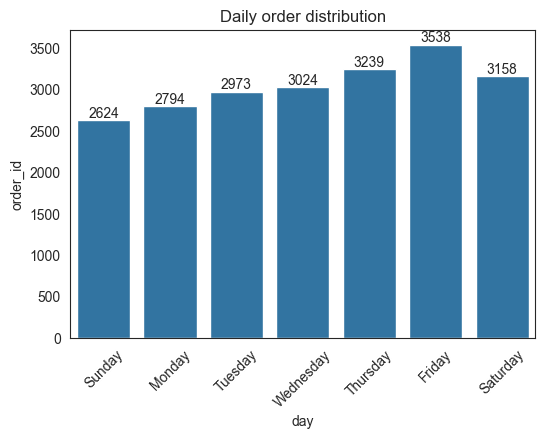

In [43]:
#Graphical representation of order distribution with the help of Matplotlib and seaborn
mp.figure(figsize = (6,4))
ax = sns.barplot(data = gb, x = gb.index, y = gb.order_id,order = ("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday"))
ax.bar_label(ax.containers[0])
mp.xticks(rotation = 45)
mp.title("Daily order distribution")
mp.show()


# Q6. Identify the time at which we are getting high orders and the time at which we are getting the lowest orders #

In [25]:
orders["order_time(hr)"] = orders["time"].dt.strftime("%H")
orders.head()

,order_id,date,time,day,order_time(hr)
0,1,2015-01-01,2023-10-12 11:38:36,Thursday,11
1,2,2015-01-01,2023-10-12 11:57:40,Thursday,11
2,3,2015-01-01,2023-10-12 12:12:28,Thursday,12
3,4,2015-01-01,2023-10-12 12:16:31,Thursday,12
4,5,2015-01-01,2023-10-12 12:21:30,Thursday,12


In [26]:
gb = orders.groupby("order_time(hr)").agg({'order_id':'count'})
gb

,order_id
order_time(hr),
09,1
10,8
11,1231
12,2520
13,2455
14,1472
15,1468
16,1920
17,2336


In [27]:
# Highest orders time:
print("We are getting highest orders around", gb["order_id"].idxmax())

We are getting highest orders around 12


In [28]:
#lowest orders time:
print("We are getting lowest orders around",gb["order_id"].idxmin())

We are getting lowest orders around 09


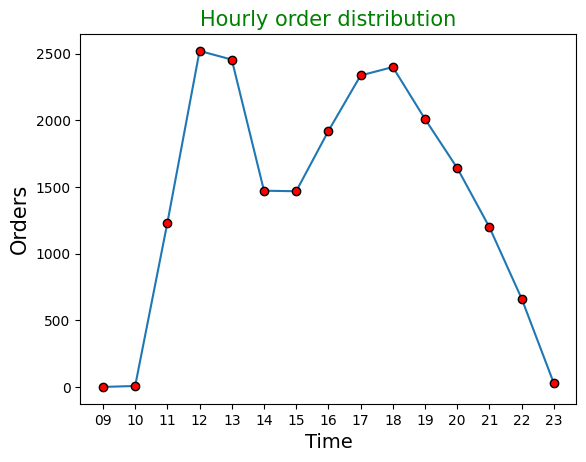

In [29]:
#Graphical representation of orders based on time using Matplotlib
mp.plot(gb.index,gb.order_id, marker = "o", mec = 'black', mfc = 'red')
mp.xlabel("Time", fontsize = 14)
mp.ylabel("Orders",fontsize = 15)
mp.title("Hourly order distribution", c="g", fontsize = 15)
mp.show()

# Q7. Identify at which time of the day, people are ordering more pizzas.(morning/evening/afternoon/night) #

In [30]:
orders['order_time(hr)'] = orders['order_time(hr)'].astype(int)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        21350 non-null  int64         
 1   date            21350 non-null  datetime64[ns]
 2   time            21350 non-null  datetime64[ns]
 3   day             21350 non-null  object        
 4   order_time(hr)  21350 non-null  int32         
dtypes: datetime64[ns](2), int32(1), int64(1), object(1)
memory usage: 750.7+ KB


In [31]:
orders.loc[(orders['order_time(hr)']<12),'sales_window'] = "morning"
orders.loc[(orders['order_time(hr)']>=12),'sales_window'] = "afternoon"
orders.loc[(orders['order_time(hr)']>=17),'sales_window'] = "evening"
orders.loc[(orders['order_time(hr)']>=21),'sales_window'] = "night"
orders.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_15652\3200767617.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'morning' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  orders.loc[(orders['order_time(hr)']<12),'sales_window'] = "morning"


,order_id,date,time,day,order_time(hr),sales_window
0,1,2015-01-01,2023-10-12 11:38:36,Thursday,11,morning
1,2,2015-01-01,2023-10-12 11:57:40,Thursday,11,morning
2,3,2015-01-01,2023-10-12 12:12:28,Thursday,12,afternoon
3,4,2015-01-01,2023-10-12 12:16:31,Thursday,12,afternoon
4,5,2015-01-01,2023-10-12 12:21:30,Thursday,12,afternoon


In [32]:
gb = orders.groupby("sales_window").agg({'order_id':'count'})
gb

,order_id
sales_window,
afternoon,9835
evening,8386
morning,1240
night,1889


In [33]:
# Pizza order based on shift time :
print("People are ordering more pizzas on:",gb['order_id'].idxmax())

People are ordering more pizzas on: afternoon


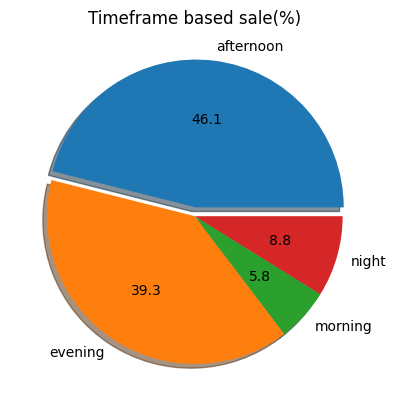

In [34]:
# Graphical representation of timeframe based pizza sale
ex = [0.06,0,0,0]
mp.pie(gb.order_id, labels = gb.index, explode = ex, autopct = "%1.1f", shadow = True)
mp.title("Timeframe based sale(%)")
mp.show()